# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2021-03-24 00:48:45 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Artifacts ─────── v1.3.0
  Installed VersionParsing ── v1.2.0
  Installed libsodium_jll ─── v1.0.18+1
  Installed MbedTLS_jll ───── v2.16.8+1
  Installed ZeroMQ_jll ────── v4.3.2+6
  Installed Parsers ───────── v1.1.0
  Installed IJulia ────────── v1.23.2
  Installed JLLWrappers ───── v1.2.0
  Installed SoftGlobalScope ─ v1.1.0
  Installed JSON ──────────── v0.21.1
  Installed ZMQ ───────────── v1.2.1
  Installed Conda ─────────── v1.5.1
  Installed MbedTLS ───────── v1.0.3
######################################

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

BenchmarkTools.Trial: 
  memory estimate:  32.00 MiB
  allocs estimate:  2
  --------------
  minimum time:     485.051 ms (0.00% GC)
  median time:      494.414 ms (0.09% GC)
  mean time:        516.716 ms (4.70% GC)
  maximum time:     608.329 ms (19.20% GC)
  --------------
  samples:          10
  evals/sample:     1

In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CuArrays

    M_gpu = cu(M)
    @benchmark CuArrays.@sync M_gpu^2
else
    println("No GPU found.")
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [ ]:
using Plots

r(θ) = 3 * (cos(θ) + 1)
plot(r, θ, 2π, title = "Hello World <3")

UndefVarError: ignored

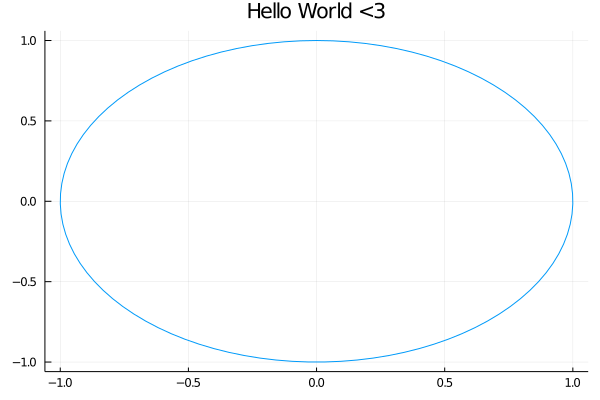

In [3]:
using Plots

vector = range(0, 2π, length = 100)

x = sin.(vector)
y = cos.(vector)

plot(x,y, title = "Hello World <3", legend = false)

In [15]:
using Plots
plotly()

θ = range(0, 2π, length = 100)

r = sin.(5 .* θ)

x = r.*cos.(θ)
y = r.*sin.(θ)

plot(x,y, title = "Hello World <3", legend = false, xlabel = "x", ylabel = "y")

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /root/.julia/packages/Plots/uCh2y/src/backends.jl:372


<!DOCTYPE html>
 
 
 Plots.jl

In [13]:
import Pkg; Pkg.add("Plotly")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed Plotly ──────────────── v0.3.0
  Installed Hiccup ──────────────── v0.2.2
  Installed JSExpr ──────────────── v0.5.2
  Installed Widgets ─────────────── v0.6.2
  Installed Lazy ────────────────── v0.15.1
  Installed URIParser ───────────── v0.4.1
  Installed PlotlyBase ──────────── v0.5.0
  Installed WebSockets ──────────── v1.5.9
  Installed BinDeps ─────────────── v1.0.2
  Installed AssetRegistry ───────── v0.1.0
  Installed Blink ───────────────── v0.12.5
  Installed Observables ─────────── v0.3.3
  Installed FunctionalCollections ─ v0.5.0
  Installed Mux ─────────────────── v0.7.5
  Installed WebIO ───────────────── v0.8.15
  Installed PlotlyJS ────────────── v0.14.1
  Installed Mustache ────────────── v1.0.10
  Installed DocStringExtensions ─── v0.8.4
  Installed Pidfile ─────────────── v1.2.0
######################################################################### 100.0%
#################################################################